In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
import joblib


load the dataset

In [3]:
df = pd.read_csv('../data/Preprocessed_RedWineQuality.csv')

In [3]:
print(df.head())

   Unnamed: 0  fixed acidity  volatile acidity  citric acid  residual sugar  \
0           0            7.4              0.70         0.00             1.9   
1           1            7.8              0.88         0.00             2.6   
2           2            7.8              0.76         0.04             2.3   
3           3           11.2              0.28         0.56             1.9   
4           4            7.4              0.70         0.00             1.9   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.076                 11.0                  34.0   0.9978  3.51   
1      0.098                 25.0                  67.0   0.9968  3.20   
2      0.092                 15.0                  54.0   0.9970  3.26   
3      0.075                 17.0                  60.0   0.9980  3.16   
4      0.076                 11.0                  34.0   0.9978  3.51   

   sulphates  alcohol  total acidity  sulphates_squared  citric_acid_ratio  \
0 

Prepare dataset for linear regression

In [4]:
x = df.drop(columns=['Quality']) # Feature
y = df['Quality'] # Targets

In [5]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=42)

Initialising and training regression model

In [6]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

Predicting on the test set

In [7]:
y_pred = model.predict(x_test)

valuate the model

In [8]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [9]:
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R^2): {r2}")

Mean Absolute Error (MAE): 0.5014241258270018
Mean Squared Error (MSE): 0.41936042875605073
R-squared (R^2): 0.35648266766651326


Plotting predicted vs actual values

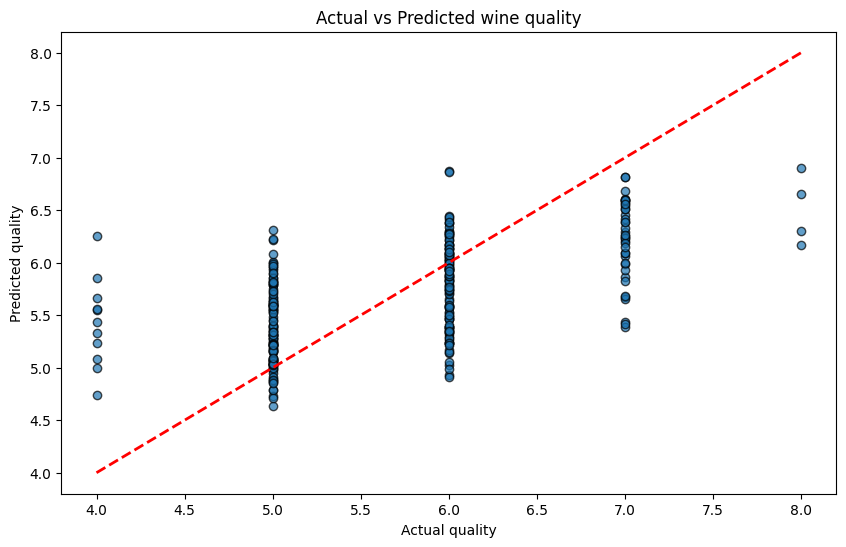

In [10]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred, alpha=0.7,edgecolors='k')
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max(),],'r--', lw=2)
plt.xlabel('Actual quality')
plt.ylabel('Predicted quality')
plt.title('Actual vs Predicted wine quality')
plt.show()

Calculate residuals

In [11]:
residuals = y_test - y_pred

Plot residuals

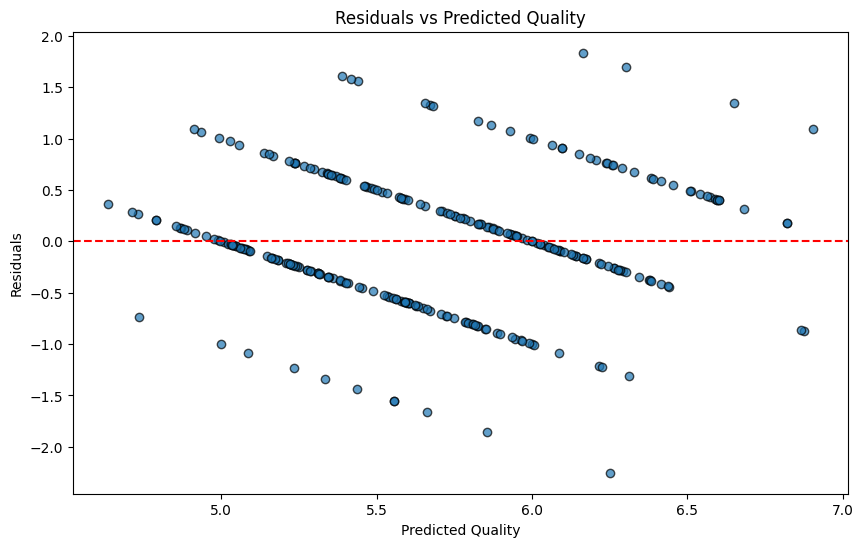

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7, edgecolors='k')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Quality')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Quality')
plt.show()

Histogram of residual

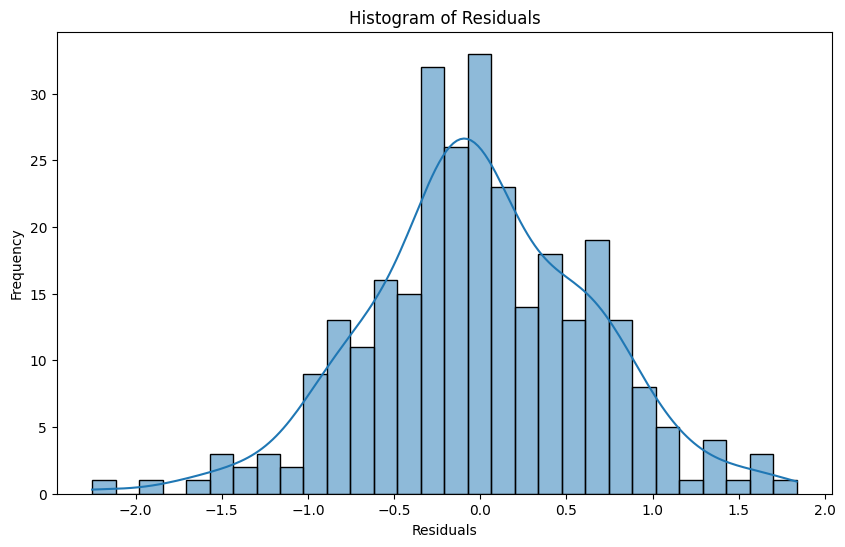

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

Get feature names and coefficients

In [14]:
coefficients = model.coef_
features = x.columns

Plot feature importances

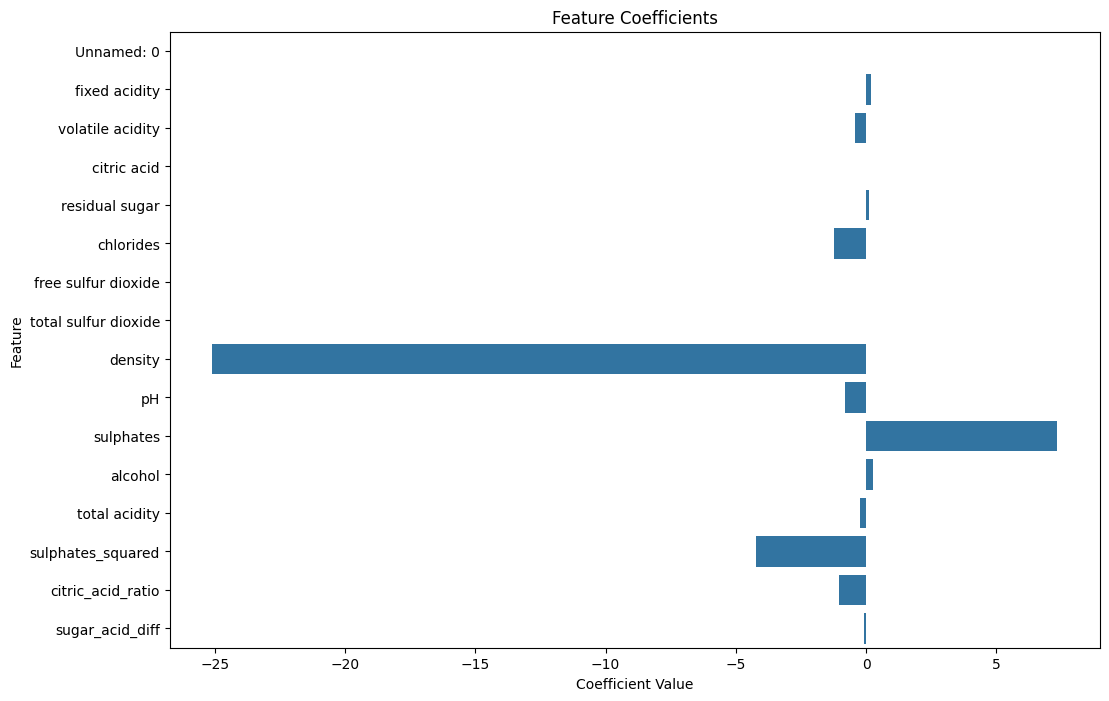

In [15]:
plt.figure(figsize=(12, 8))
sns.barplot(x=coefficients, y=features)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Coefficients')
plt.show()

In [16]:
train_sizes, train_scores, test_scores = learning_curve(
    model, x, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

Plot learning curves

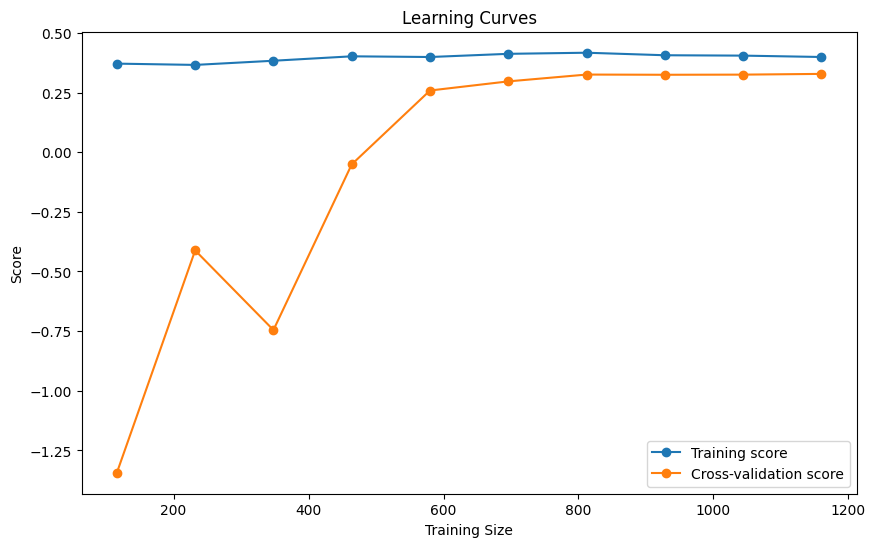

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Cross-validation score')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.title('Learning Curves')
plt.legend(loc='best')
plt.show()

In [19]:
joblib.dump(model, '../model/LinearRegressionModel.pkl')

['../model/LinearRegressionModel.pkl']